# Importando bibliotecas

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/My Drive/DataSet/song_data.csv')

In [ ]:
df_original=df.copy()

In [ ]:
df.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

In [ ]:
data = {'Variável': ['song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature'],
        'Descrição': ['É a variável de destino que você deseja prever. É um número inteiro que varia de 0 a 100, representando a popularidade da música.',
                      'É a duração da música em milissegundos.',
                      'É uma medida de quão acústica é a música em uma escala de 0 a 1, onde 1 indica que a música é totalmente acústica.',
                      'É uma medida de quão dançante é a música em uma escala de 0 a 1, onde 1 indica que a música é altamente dançante.',
                      'É uma medida de quão energética é a música em uma escala de 0 a 1, onde 1 indica que a música é altamente energética.',
                      'É uma medida de quão instrumental é a música em uma escala de 0 a 1, onde 1 indica que a música é totalmente instrumental.',
                      'É a chave tonal da música (0 = C, 1 = C#, 2 = D, etc.).',
                      'É uma medida de quão "ao vivo" é a música em uma escala de 0 a 1, onde 1 indica que a música foi gravada ao vivo.',
                      'É uma medida de quão alta é a música em decibéis (dB).',
                      'É uma variável binária que indica se a música é predominantemente em uma única tonalidade (valor 1) ou em várias tonalidades (valor 0).',
                      'É uma medida de quão "falada" é a música em uma escala de 0 a 1, onde 1 indica que a música é totalmente falada.',
                      'É o tempo em batidas por minuto (BPM).',
                      'É o número de batidas em cada barra de compasso da música.']
        }


In [ ]:
df.shape

(18835, 15)

In [ ]:
display(df.describe())

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [ ]:
df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
song_name           13070
dtype: int64

Colocando a variável alvo na última coluna do Dataset.

In [ ]:
df = df.drop('song_popularity', axis=1).assign(song_popularity=df['song_popularity'])





In [ ]:
df.shape[0]

18835

In [ ]:
df.columns

Index(['song_name', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence',
       'song_popularity'],
      dtype='object')

In [ ]:
df.isnull().sum()

song_name           0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
song_popularity     0
dtype: int64

Não possui amostras com valores nulos em nenhuma coluna.

In [ ]:
print('Total de linhas duplicadas: {}'.format(df.duplicated().sum()))


Total de linhas duplicadas: 3909


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(14926, 15)

In [ ]:
sns.set_palette("mako")
sns.set_style("dark")

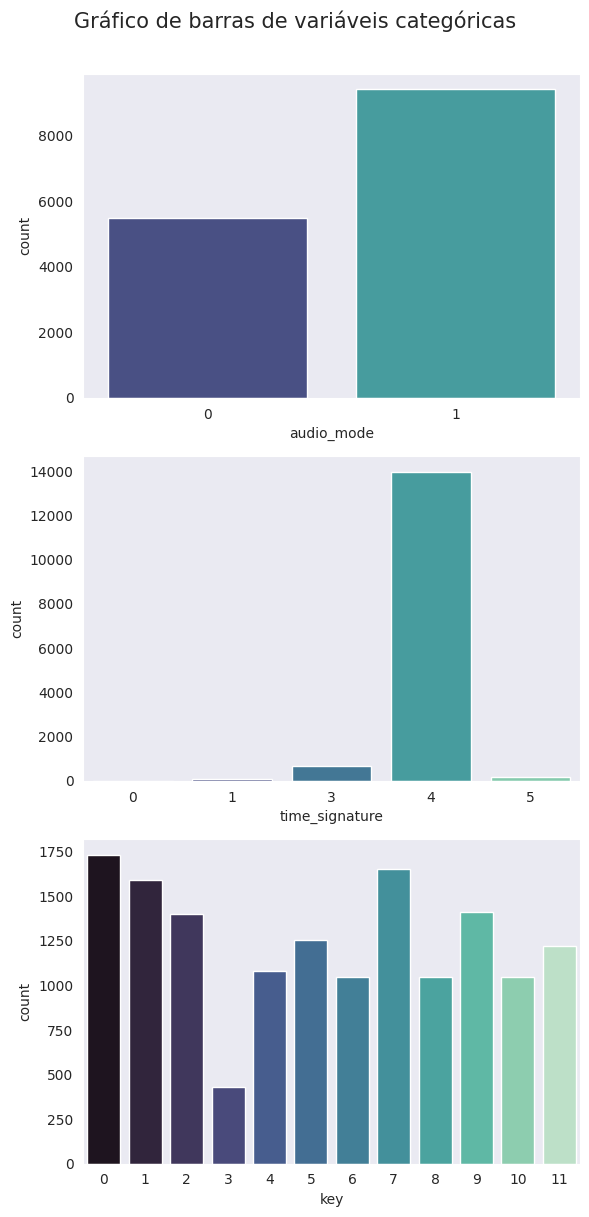

In [ ]:
fig, ax= plt.subplots(nrows=3, figsize=(6,12))

columns_cat= ['audio_mode','time_signature','key']

for i, col in enumerate(columns_cat):
   sns.countplot(x=df[col], ax=ax[i], palette='mako')

fig.suptitle('Gráfico de barras de variáveis categóricas', size=15, y=1.01)

plt.tight_layout()
plt.show()

In [ ]:
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

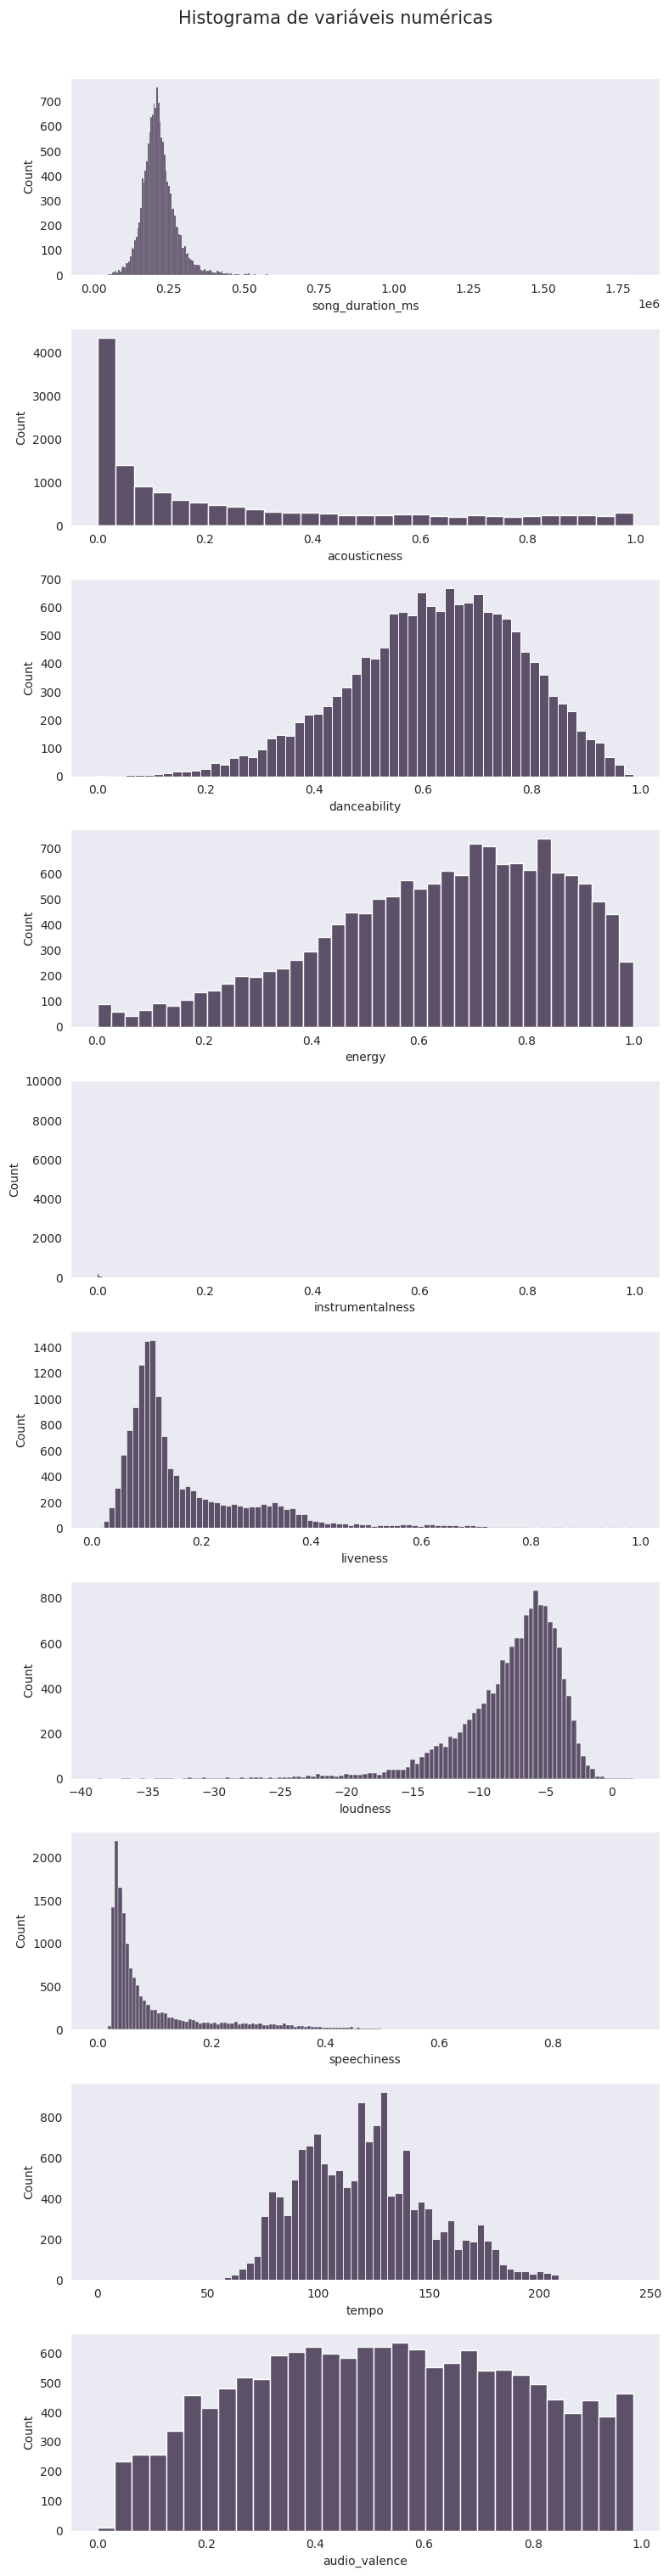

In [ ]:
fig, ax= plt.subplots(nrows=10, figsize=(8,30))

columns_num= ['song_duration_ms', 'acousticness', 'danceability',
       'energy','instrumentalness', 'liveness', 'loudness',
        'speechiness', 'tempo', 'audio_valence']

for i, col in enumerate(columns_num):

      sns.histplot(df[col], ax=ax[i])


fig.suptitle('Histograma de variáveis numéricas', size=15,y=1.01)
plt.tight_layout()
plt.show()

A visualização da variável "instrumentalness" ficou vazia, pois os valores estão muito concentrados próximo ao 1.
configurarei a quantidade de bins melhor clareza.


<Axes: xlabel='instrumentalness', ylabel='Count'>

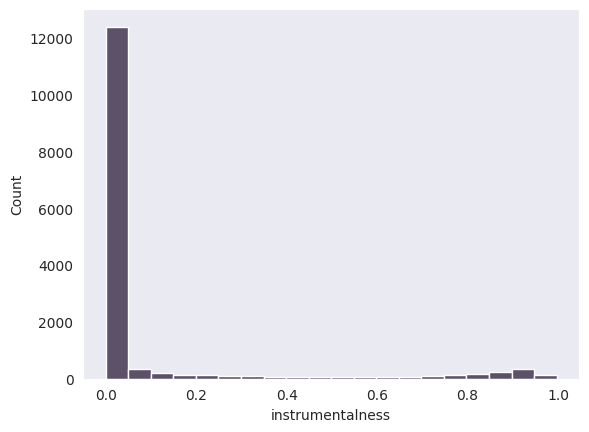

In [ ]:
sns.histplot(df['instrumentalness'], bins=20)



# Descoberta de padrões em relação à popularidade de músicas:

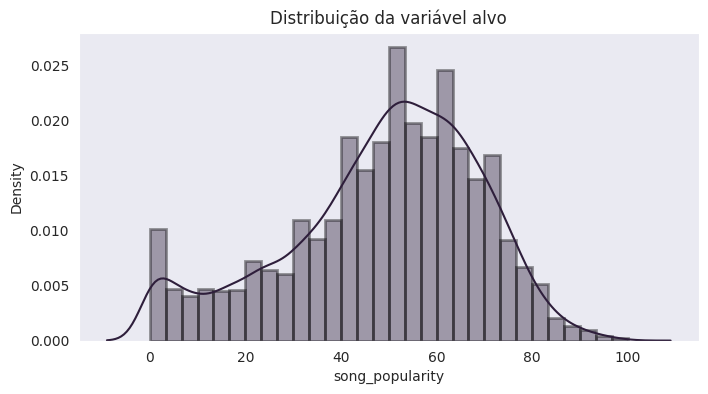

In [ ]:
plt.figure(figsize=[8,4])
sns.distplot(df['song_popularity'],hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Distribuição da variável alvo')
plt.show()

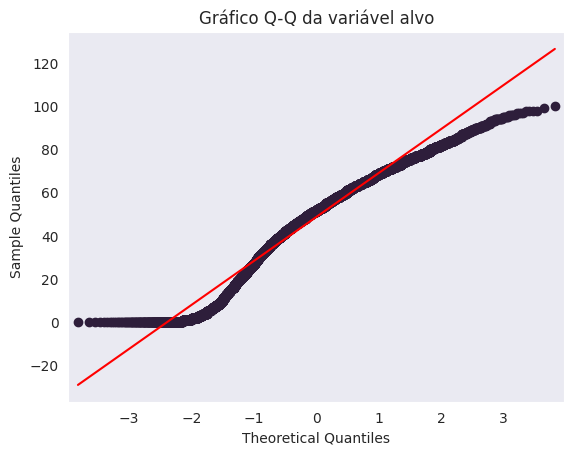

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

qqplot(df['song_popularity'], line='s')

plt.title('Gráfico Q-Q da variável alvo')
plt.show()

A variável alvo não é 'normalmente distribuída'. Há uma assimetria negativa clara.

## Análise bivariada de variáveis categóricas

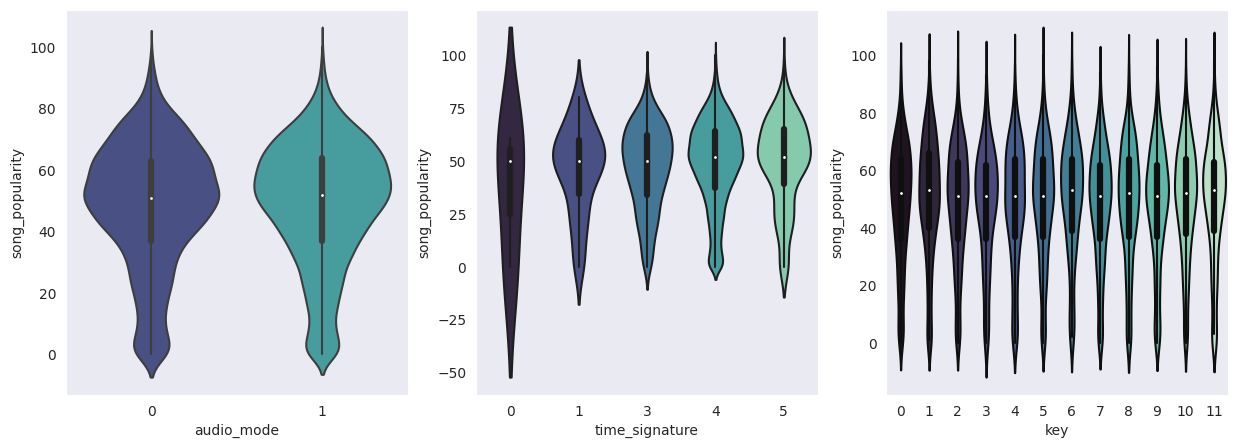

In [ ]:
fig, ax= plt.subplots(ncols=len(columns_cat), figsize=(15, 5))
for i, categorical in enumerate(columns_cat):
  sns.violinplot(x=df[categorical], y=df['song_popularity'], ax=ax[i], palette='mako')

Parece-nos que, segundo a plotagem acima, a popularidade da música não sofre influência do Tom, batida rítmica por compasso musical e se ela modula ou não.


## Análise bivariada de variáveis numéricas

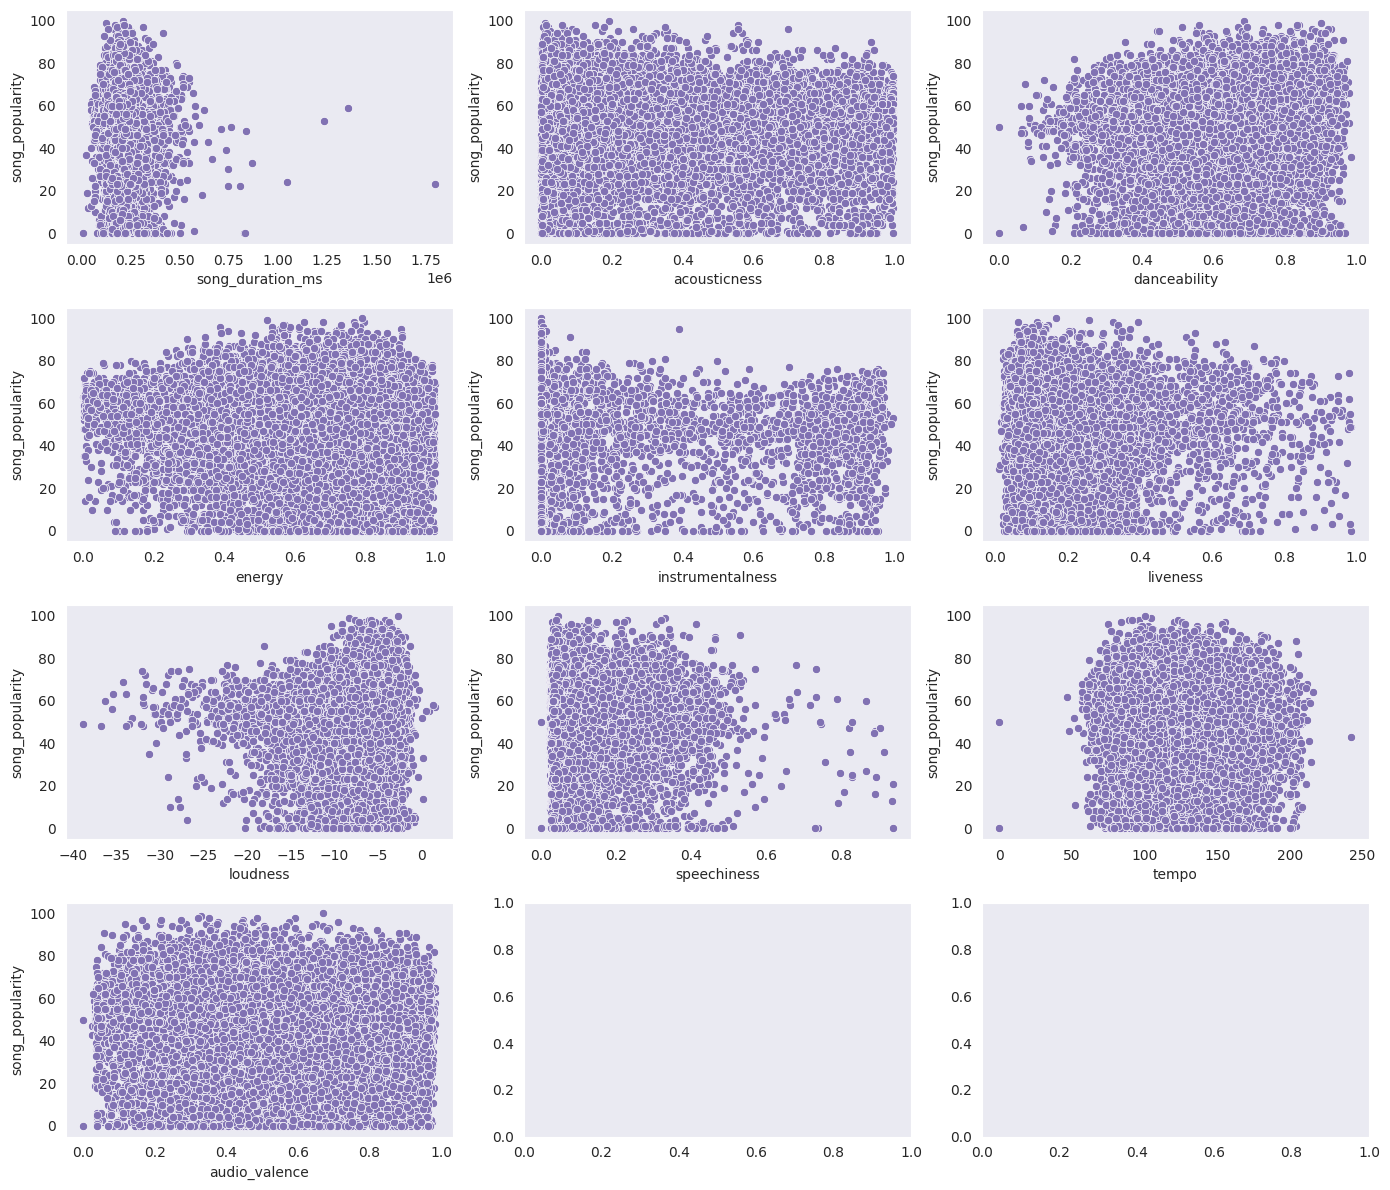

In [ ]:
# Definindo o tamanho da figura e o número de subplots
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))

# Criando os plots
for i, numerical in enumerate(columns_num):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=numerical, y='song_popularity', data=df, ax=ax[row, col], color='#8172b3')

# Ajustando o layout dos subplots
plt.tight_layout()


Não há relação linear forte entre alguma variável preditora e a variável alvo(song_popularity)

In [ ]:
len(columns_num)

10

# Preprocessamento

In [ ]:
q1 = df[columns_num].quantile(0.25)
q3 = df[columns_num].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[~((df[columns_num] < lower_bound) | (df[columns_num] > upper_bound)).any(axis=1)]



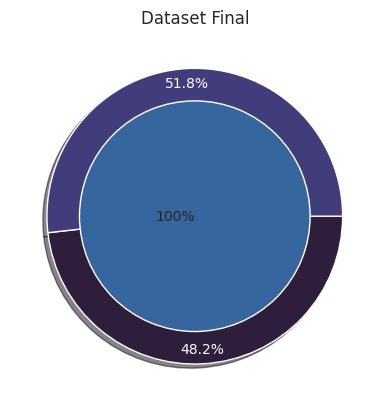


Conclusão: Após o processo de limpeza, 9753 amostras foram removidas, mantendo 51.78% dos dados.


In [ ]:
plt.title('Dataset Final')
plt.pie([df.shape[0], df_original.shape[0]-df.shape[0]], radius=1, labels=['Mantido','Dropado'], counterclock=False,
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True, textprops={'color': 'white'})
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mConclusão:\033[0m Após o processo de limpeza, {df_original.shape[0] - df.shape[0]} amostras foram removidas, \
mantendo {round(100 - (df.shape[0]*100/(df_original.shape[0])),2)}% dos dados.')



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Selecionando as colunas categóricas
columns_cat= ['audio_mode','time_signature','key']

# Criando objeto OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Codificando as colunas categóricas
encoded = encoder.fit_transform(df[columns_cat])

# Obtendo os nomes das colunas codificadas
col_names = [f"{col}_{cat}" for col in columns_cat for cat in encoder.categories_[columns_cat.index(col)]]

# Criando o DataFrame codificado
df_encoded = pd.DataFrame(encoded, columns=col_names)

# Resetando o índice dos dataframes
df.reset_index(drop=True, inplace=True)
df_encoded.reset_index(drop=True, inplace=True)

# Concatenando o DataFrame codificado com o DataFrame original
df = pd.concat([df, df_encoded], axis=1)

# Excluindo as colunas originais
df = df.drop(columns_cat, axis=1)

# Corrigindo o índice da coluna 'song_popularity'
df = df.drop('song_popularity', axis=1).assign(song_popularity=df['song_popularity'])






In [ ]:
df= df.drop('song_name', axis=1)

In [ ]:
df


song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0               262333      0.005520         0.496   0.682          0.000029   
1               216933      0.010300         0.542   0.853          0.000000   
2               216933      0.026400         0.451   0.970          0.003550   
3               223826      0.000954         0.447   0.766          0.000000   
4               235893      0.008950         0.316   0.945          0.000002   
...                ...           ...           ...     ...               ...   
9077            114582      0.898000         0.370   0.136          0.000263   
9078            195106      0.395000         0.644   0.523          0.000000   
9079            205666      0.765000         0.495   0.161          0.000001   
9080            182211      0.847000         0.719   0.325          0.000000   
9081            193533      0.911000         0.640   0.381          0.000254   

      liveness  loudness  speechiness    tempo  audio_valence  ...  key_3  \
0       0.0589    -4.095       0.0294  167.060         0.4740  ...    0.0   
1       0.1080    -6.407       0.0498  105.256         0.3700  ...    1.0   
2       0.1020    -4.938       0.1070  122.444         0.1980  ...    0.0   
3       0.1130    -5.065       0.0313  172.011         0.5740  ...    0.0   
4       0.3960    -3.169       0.1240  189.931         0.3200  ...    0.0   
...        ...       ...          ...      ...            ...  ...    ...   
9077    0.0999   -13.528       0.0433  146.081         0.0592  ...    0.0   
9078    0.0930    -7.660       0.0378   95.966         0.4450  ...    0.0   
9079    0.1050   -14.078       0.0301   94.286         0.2650  ...    0.0   
9080    0.1250   -12.222       0.0355  130.534         0.2860  ...    0.0   
9081    0.1040   -11.790       0.0302   91.490         0.5810  ...    0.0   

      key_4  key_5  key_6  key_7  key_8  key_9  key_10  key_11  \
0       0.0    0.0    0.0    0.0    1.0    0.0     0.0     0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0     1.0     0.0   
4       1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
...     ...    ...    ...    ...    ...    ...     ...     ...   
9077    0.0    0.0    0.0    1.0    0.0    0.0     0.0     0.0   
9078    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
9079    0.0    0.0    0.0    0.0    0.0    0.0     0.0     1.0   
9080    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   
9081    1.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0   

      song_popularity  
0                  73  
1                  66  
2                  74  
3                  56  
4                  80  
...               ...  
9077               55  
9078               62  
9079               60  
9080               23  
9081               60  

[9082 rows x 29 columns]

# Extração de Features

<Axes: >

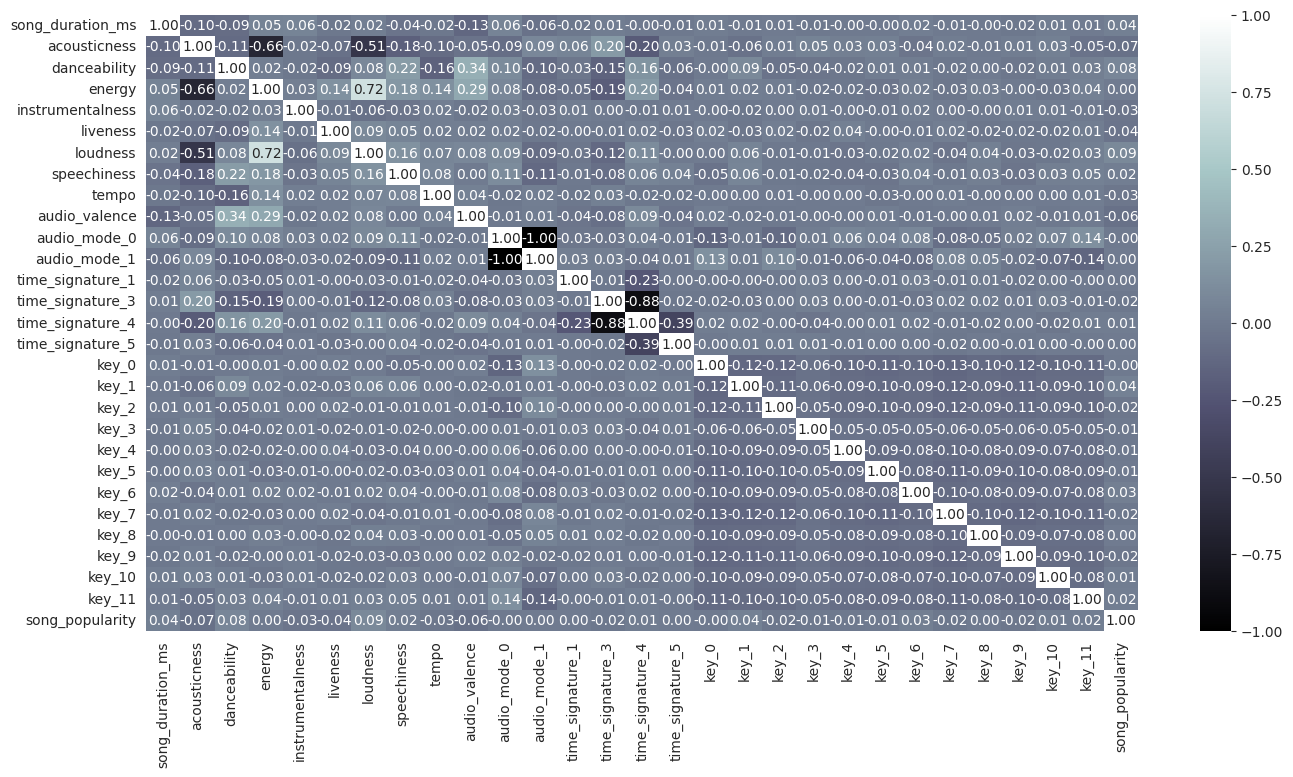

In [ ]:
corr= df.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='bone')

Hipótese - é provável que o uso de modelos lineares para predição do nível de popularidades obtenha más resultados, pois não captarão, em essência, a relação entre as features.

In [ ]:
# Cria a matriz de correlação
corr_matrix = df.corr()

# Desconsidera as correlações iguais a 1 (correlações perfeitas)
corr_matrix = corr_matrix[corr_matrix != 1]

# Transforma a matriz de correlação em uma série
correlations = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Obtém as 20 maiores correlações (positivas e negativas)
top_corr = correlations.head(10)

# Obtém as 20 menores correlações negativas
bottom_corr = correlations.tail(10)

# Combina as correlações positivas com as correlações negativas em ordem inversa
final_corr = pd.concat([top_corr, bottom_corr])

# Verifica se a correlação é positiva ou negativa e adiciona o valor absoluto da correlação
final_corr = final_corr.apply(lambda x: ("Positive", x) if x > 0 else ("Negative", abs(x)))

# Reordena as correlações em ordem decrescente
final_corr = final_corr.sort_values(ascending=False)

# Exibe as principais correlações com indicação positiva ou negativa
display(final_corr)




loudness          energy               (Positive, 0.7229980909451073)
danceability      audio_valence       (Positive, 0.33936046245613827)
energy            audio_valence        (Positive, 0.2896233712727672)
danceability      speechiness         (Positive, 0.21822773839610538)
time_signature_4  energy              (Positive, 0.20079962242310428)
acousticness      time_signature_3    (Positive, 0.20045056864472385)
speechiness       energy              (Positive, 0.18053137896385243)
danceability      time_signature_4    (Positive, 0.16363819603575275)
loudness          speechiness          (Positive, 0.1555226963670747)
liveness          energy               (Positive, 0.1446389609878914)
audio_mode_0      audio_mode_1         (Negative, 0.9999999999999998)
time_signature_3  time_signature_4     (Negative, 0.8816742884030251)
energy            acousticness         (Negative, 0.6574677511507746)
loudness          acousticness         (Negative, 0.5115534135057628)
time_signature_5  ti

As correlaçõoes entre as variáveis que se mostraram relevantes:

- energy        -       acousticness             (Negative, 0.657)
- loudness      -        acousticness             (Negative, 0.511)
- energy        -        loudness                 (Positive, 0.722)

Na prática, de fato, quanto maior o nível de "energia" da música, maior intensidade no volume relativo de gravação ela terá. Em contrapartida, a característica acústica da música normalmente diminui ao fazer uso de recursos mais energéticos durante a gravação(correlação negativa).

--------------------------------------------------------------------------------

Como time_signature=4 está em quase todas as amostras, substituirei todos os demais valores possíveis para a variável por uma nova feature chamada: time_signature_other, a fim de reduzir a dimensionalidade.

In [ ]:
df['time_signature_other'] = df[['time_signature_1','time_signature_3', 'time_signature_5']].apply(lambda x: 1 if x.any() else 0, axis=1)
df = df.drop(['time_signature_1','time_signature_3', 'time_signature_5'], axis=1)

In [ ]:
df.columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'audio_valence', 'audio_mode_0', 'audio_mode_1', 'time_signature_4',
       'key_0', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7',
       'key_8', 'key_9', 'key_10', 'key_11', 'song_popularity',
       'time_signature_other'],
      dtype='object')

## Realizando algumas transformações em algumas variáveis a fim de atenuar as assimetrias.

### Transformação logarítmica para tratamento de assimetria positiva

In [ ]:
df['acousticness'] = np.log1p(df['acousticness'])
df['liveness'] = np.log1p(df['liveness'])
df['speechiness'] = np.log1p(df['speechiness'])
df['instrumentalness'] = np.log1p(df['instrumentalness'])

Spoiler: Tais transformaçôes estritamente não otimizaram o resultado dos algorítmos...

## Dividindo dados entre treino e teste para validação e análise dos resultados

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['song_popularity'],axis=1)
Y = df['song_popularity']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

## Padronizando os datos através do StandardScaler

Fundamental como uma das etapas finais do pré-processamento.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Padronize as características
scaler = StandardScaler()
Train_X_std = scaler.fit_transform(Train_X)
Test_X_std = scaler.transform(Test_X)




---

Há inúmeras maneiras de realizar o processo de feature selection.

A princípio, nos apropriaremos da forma manual, através do método variance inflation factor, onde cada uma das variáveis é separada das demais, tornando-se alvo de predição, para, assim, calcular-se o valor R2 Score. Tal procedimento é repetido, até que, ao final, possuamos em maõs o valor R2 de cada feature.

A informação acerca da importância de cada variável é então extraída, de forma que, quanto maior o fator(R2), mais esta variável pode ser explicada(do ponto de vista linear) pelas outras variáveis, tornando-se menos relevante, e, portanto, fazendo plausível sua exclusão para fins de redução de dimensionalidade.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
# Cálculo dos fatores de VIF para cada variável independente
vif["VIF Factor"] = [variance_inflation_factor(Train_X.values, i) for i in range(Train_X.shape[1])]
vif["features"] = X.columns

In [ ]:
vif=vif.sort_values(by='VIF Factor', ascending=False).reset_index(drop=True)


In [ ]:
all_features= list(vif['features'])

In [ ]:
print('Features ordenadas por nível de importância segundo Variance Inflation Factor(do menor para o maior):')
all_features

Features ordenadas por nível de importância segundo Variance Inflation Factor(do menor para o maior):


['key_0',
 'key_1',
 'key_11',
 'key_10',
 'key_9',
 'key_8',
 'key_7',
 'key_6',
 'key_5',
 'key_4',
 'key_3',
 'key_2',
 'time_signature_other',
 'time_signature_4',
 'audio_mode_1',
 'audio_mode_0',
 'energy',
 'loudness',
 'acousticness',
 'audio_valence',
 'danceability',
 'speechiness',
 'tempo',
 'liveness',
 'song_duration_ms',
 'instrumentalness']

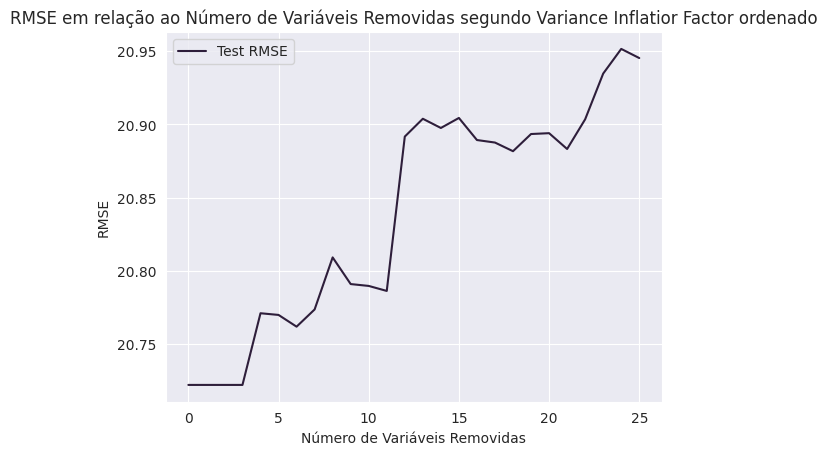

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Inicialização das listas para armazenar os valores de RMSE
rmse_test = []
num_features_removed = []

# Criação do DataFrame Test_x_std
Test_x_std = pd.DataFrame(Test_X_std, columns=Test_X.columns)
Train_x_std = pd.DataFrame(Train_X_std, columns=Train_X.columns)

# Criação do modelo de regressão linear inicial e ajuste aos dados
LR = LinearRegression()
LR.fit(Train_x_std, Train_Y)
pred_test = LR.predict(Test_x_std)
rmse_test.append(np.sqrt(mean_squared_error(Test_Y, pred_test)))
num_features_removed.append(0)

# Loop para realizar a regressão linear removendo uma variável em cada iteração
for i in range(1, Test_x_std.shape[1]+1):
    # Verificar se ainda há colunas no dataframe
    if Test_x_std.shape[1] > 1:
        # Cálculo do VIF para cada variável em Test_x_std
        vif = pd.DataFrame()
        vif['Features'] = Test_x_std.columns
        vif['VIF'] = [variance_inflation_factor(Test_x_std.values, j) for j in range(Test_x_std.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by="VIF", ascending=False).reset_index(drop=True)

        # Remoção da variável menos importante em Test_x_std
        feature_to_drop = vif.loc[0, 'Features']
        Test_x_std = Test_x_std.drop(feature_to_drop, axis=1)
        Train_x_std = Train_x_std.drop(feature_to_drop, axis=1)

        # Criação do modelo de regressão linear e ajuste aos dados
        LR = LinearRegression()
        LR.fit(Train_x_std, Train_Y)

        # Previsão no conjunto de teste
        pred_test = LR.predict(Test_x_std)

        # Cálculo do RMSE e armazenamento dos valores
        rmse_test.append(np.sqrt(mean_squared_error(Test_Y, pred_test)))
        num_features_removed.append(i)
    else:
        break  # Encerrar o loop se não houver mais colunas

# Plotagem do gráfico de linha
plt.plot(num_features_removed, rmse_test, label='Test RMSE')
plt.xlabel('Número de Variáveis Removidas')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE em relação ao Número de Variáveis Removidas segundo Variance Inflatior Factor ordenado')
plt.grid()
plt.show()



Para ratificar nossa tese, utilizaremos outro algoritmo chamado Recursive feature elimination (RFE).

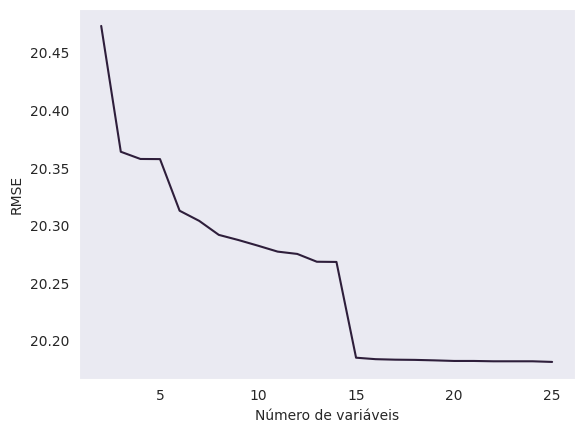

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Criar lista vazia para armazenar RMSEs
rmse_list = []

# Iterar sobre o número de variáveis selecionadas pelo RFE
for i in range(2, Train_X.shape[1]):
    # Selecionar as i melhores variáveis pelo RFE
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    Train_X_rfe = rfe.fit_transform(Train_X, Train_Y)

    # Treinar modelo de regressão linear com as i variáveis selecionadas pelo RFE
    model = LinearRegression().fit(Train_X_rfe, Train_Y)

    # Calcular RMSE
    pred = model.predict(Train_X_rfe)
    rmse = np.sqrt(mean_squared_error(Train_Y, pred))
    rmse_list.append(rmse)

# Plotar gráfico de RMSE versus número de variáveis
plt.plot(range(2, Train_X.shape[1]), rmse_list)
plt.xlabel('Número de variáveis')
plt.ylabel('RMSE')
plt.show()


A visualização do gráfico acima nos permite inferir que o número de variáveis utilizadas na etapa de treinamento do modelo influencia-o diretamente.
Algumas são relevantes e, portanto, devem ser utilizadas para melhor resultado do modelo. Outras, são dispensáveis, e, caso utilizadas, não contribuirão de forma massiva.

Parece-nos que o número ideal de variáveis é 15, selecionadas pelo nível que importância captado pelo algorítmo RFE.

Abaixo, mostrarei uma tabela, ordenando pelo tal nível de importância:

In [ ]:
cols = Train_X.columns[rfe.ranking_.argsort()]

# Criar DataFrame com nome da feature e ranking de importância
importance = pd.DataFrame({'feature': cols, 'importance_rank': range(1, len(cols)+1)})

# Exibir DataFrame
importance=importance.sort_values(by='importance_rank', ascending=False)
display(importance)


feature  importance_rank
25      song_duration_ms               26
24                key_11               25
23          acousticness               24
22          danceability               23
21                energy               22
20      instrumentalness               21
19              liveness               20
18              loudness               19
17           speechiness               18
16                 tempo               17
15         audio_valence               16
14          audio_mode_0               15
13          audio_mode_1               14
12  time_signature_other               13
11                 key_0               12
10                 key_1               11
9                  key_2               10
8                  key_3                9
7                  key_4                8
6                  key_5                7
5                  key_6                6
4                  key_7                5
3                  key_8                4
2                  key_9                3
1                 key_10                2
0       time_signature_4                1

# Modelando

Após removermos as 15 variáveis(onde, a partir de tal valor, há um platô no gráfico...), faremos uma lista com as features relevantes para nosso modelo.

In [ ]:
relevant_features = [
    "song_duration_ms",
    "key_11",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "loudness",
    "speechiness",
    "tempo",
    "audio_valence",
    "audio_mode_0",
    "audio_mode_1",
    "time_signature_other"
]


Abaixo, aplicaremos diversos modelos lineares e analisaremos seus resultados através da tradicional métrica: Root Mean Score Error(Erro Quadrático Médio) e R2 score.




---


---



---

## RMSE

O RMSE é calculado como a raiz quadrada da média dos erros ao quadrado entre os valores previstos pelo modelo e os valores reais do conjunto de dados. É uma métrica que fornece uma medida da dispersão dos erros do modelo, indicando o quão próximos os valores previstos estão dos valores reais.

Uma pontuação de RMSE mais baixa indica um melhor ajuste do modelo aos dados, ou seja, um valor menor indica que o modelo tem uma capacidade de previsão mais precisa e com menor erro médio. O RMSE é amplamente utilizado em problemas de regressão para comparar diferentes modelos ou ajustar parâmetros do modelo, permitindo selecionar o modelo com melhor desempenho ou identificar melhorias no ajuste do modelo.



---



---

---

## R2 score


O R2 score, também conhecido como coeficiente de determinação, é uma métrica utilizada para avaliar a qualidade de um modelo de regressão. Essa métrica mede a proporção da variabilidade dos dados de resposta (variável dependente) que é explicada pelo modelo.

O valor do R2 score varia entre 0 e 1, sendo que:

R2 score = 1 indica um ajuste perfeito do modelo aos dados, onde todas as variações na variável dependente são explicadas pelas variáveis independentes.
R2 score = 0 indica que o modelo não é capaz de explicar nenhuma variação na variável dependente, sendo equivalente a um modelo constante que apenas prevê a média dos valores observados.
Em outras palavras, o R2 score fornece uma medida de quão bem o modelo se ajusta aos dados, comparando a variação explicada pelo modelo com a variação total presente nos dados. Quanto mais próximo o R2 score estiver de 1, melhor o modelo se ajusta aos dados, capturando uma maior proporção da variabilidade.

É importante ressaltar que o R2 score não indica se o modelo é adequado para fazer previsões precisas em novos dados ou se as relações encontradas são causalmente significativas. Ele apenas indica a qualidade do ajuste do modelo aos dados utilizados para construí-lo.

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Criação dos DataFrames Train_x_std e Test_x_std
Train_x_std = pd.DataFrame(Train_X_std, columns=Train_X.columns)
Test_x_std = pd.DataFrame(Test_X_std, columns=Train_X.columns)

# Lista de modelos
models = [
    ("Regressão Linear", LinearRegression()),
    ("Lasso", Lasso()),
    ("Ridge", Ridge()),
    ("Regressão Polinomial", PolynomialFeatures(degree=2)),
    ("ElasticNet", ElasticNet())
]

# Inicialização das listas para armazenar as métricas
model_names = []
rmse_values = []
r2_values = []

# Loop para calcular o RMSE e R2 score para cada modelo
for name, model in models:
    if name == "Regressão Polinomial":
        # Transforma os dados para regressão polinomial
        poly = PolynomialFeatures(degree=2)
        Train_x_poly = poly.fit_transform(Train_x_std[relevant_features])
        Test_x_poly = poly.transform(Test_x_std[relevant_features])

        # Ajusta o modelo de regressão linear aos dados de treinamento
        lr_model = LinearRegression()
        lr_model.fit(Train_x_poly, Train_Y)

        # Realiza a previsão nos dados de teste
        pred_test = lr_model.predict(Test_x_poly)
    else:
        # Ajusta o modelo aos dados de treinamento
        model.fit(Train_x_std[relevant_features], Train_Y)

        # Realiza a previsão nos dados de teste
        pred_test = model.predict(Test_x_std[relevant_features])

    # Calcula o RMSE e R2 score
    rmse = np.sqrt(mean_squared_error(Test_Y, pred_test))
    r2 = r2_score(Test_Y, pred_test)

    # Armazena as métricas na lista
    model_names.append(name)
    rmse_values.append(rmse)
    r2_values.append(r2)

# Criação do DataFrame com as métricas
metrics_df = pd.DataFrame({"Model": model_names, "RMSE": rmse_values, "R2 Score": r2_values})

# Exibição do DataFrame
display(metrics_df)



Model       RMSE  R2 Score
0      Regressão Linear  20.665998  0.026660
1                 Lasso  20.821732  0.011935
2                 Ridge  20.665995  0.026660
3  Regressão Polinomial  20.624596  0.030556
4            ElasticNet  20.798616  0.014128

Os modelos utilizados não obtiveram bons resultados. O R2 Score mostrado acima é consideravelmente baixo.

Alguns fatores podem ter ocasionado tal fato:

- As variáveis do dataset não possuem relação linear consistente com a variável alvo(claramente demonstrado no mapa de correlações).
- Presença de relação não-linear entre as variáveis, que não pôde ser capturada pelos modelos acima.




---





---



Abaixo, farei uso de um algorítmo mais complexo, que captura de maneira condizente as relações não-lineares entre os dados.
XGboost, modelo que tem ganhado preponderante destaque nos últimos anos por produzir ótimos resultados. Porém, em sua aplicação, é necessário fazer a tunagem de alguns hyperparâmetros, fator importante na eficiência de seu funcionamento.

Meu intuito é entender se o uso de um modelo de MachineLearning mais avançado é capaz de, mediante nosso objetivo atual, otimizar os resultados na previsão do nível de popularidade das músicas.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint

# Definir os parâmetros a serem ajustados
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
}

# Criar o objeto do modelo XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Realizar a pesquisa aleatória para ajustar os parâmetros
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,  # Reduzir o número de iterações
    scoring='neg_root_mean_squared_error',  # Métrica para avaliação
    cv=3,  # Reduzir o número de folds para validação cruzada
    random_state=42,
    n_jobs=-1  # Utilizar todos os núcleos do processador
)

# Treinar o modelo com os dados de treinamento e os parâmetros otimizados
random_search.fit(Train_x_std[relevant_features], Train_Y)

# Obter os melhores parâmetros encontrados
best_params = random_search.best_params_

# Criar o modelo XGBoost com os parâmetros otimizados
model = xgb.XGBRegressor(**best_params)

# Treinar o modelo com os dados de treinamento
model.fit(Train_x_std[relevant_features], Train_Y)

# Realizar a previsão nos dados de teste
pred_test = model.predict(Test_x_std[relevant_features])

# Avaliar a performance do modelo
mse = mean_squared_error(Test_Y, pred_test)
rmse = np.sqrt(mse)

print("RMSE:", rmse)





RMSE: 20.628652033641853


Infelizmente, a aplicação do XgBoost não melhorou o resultado.

Text(0.5, 1.0, 'Gráficos de dispersão entre variáveis numéricas')

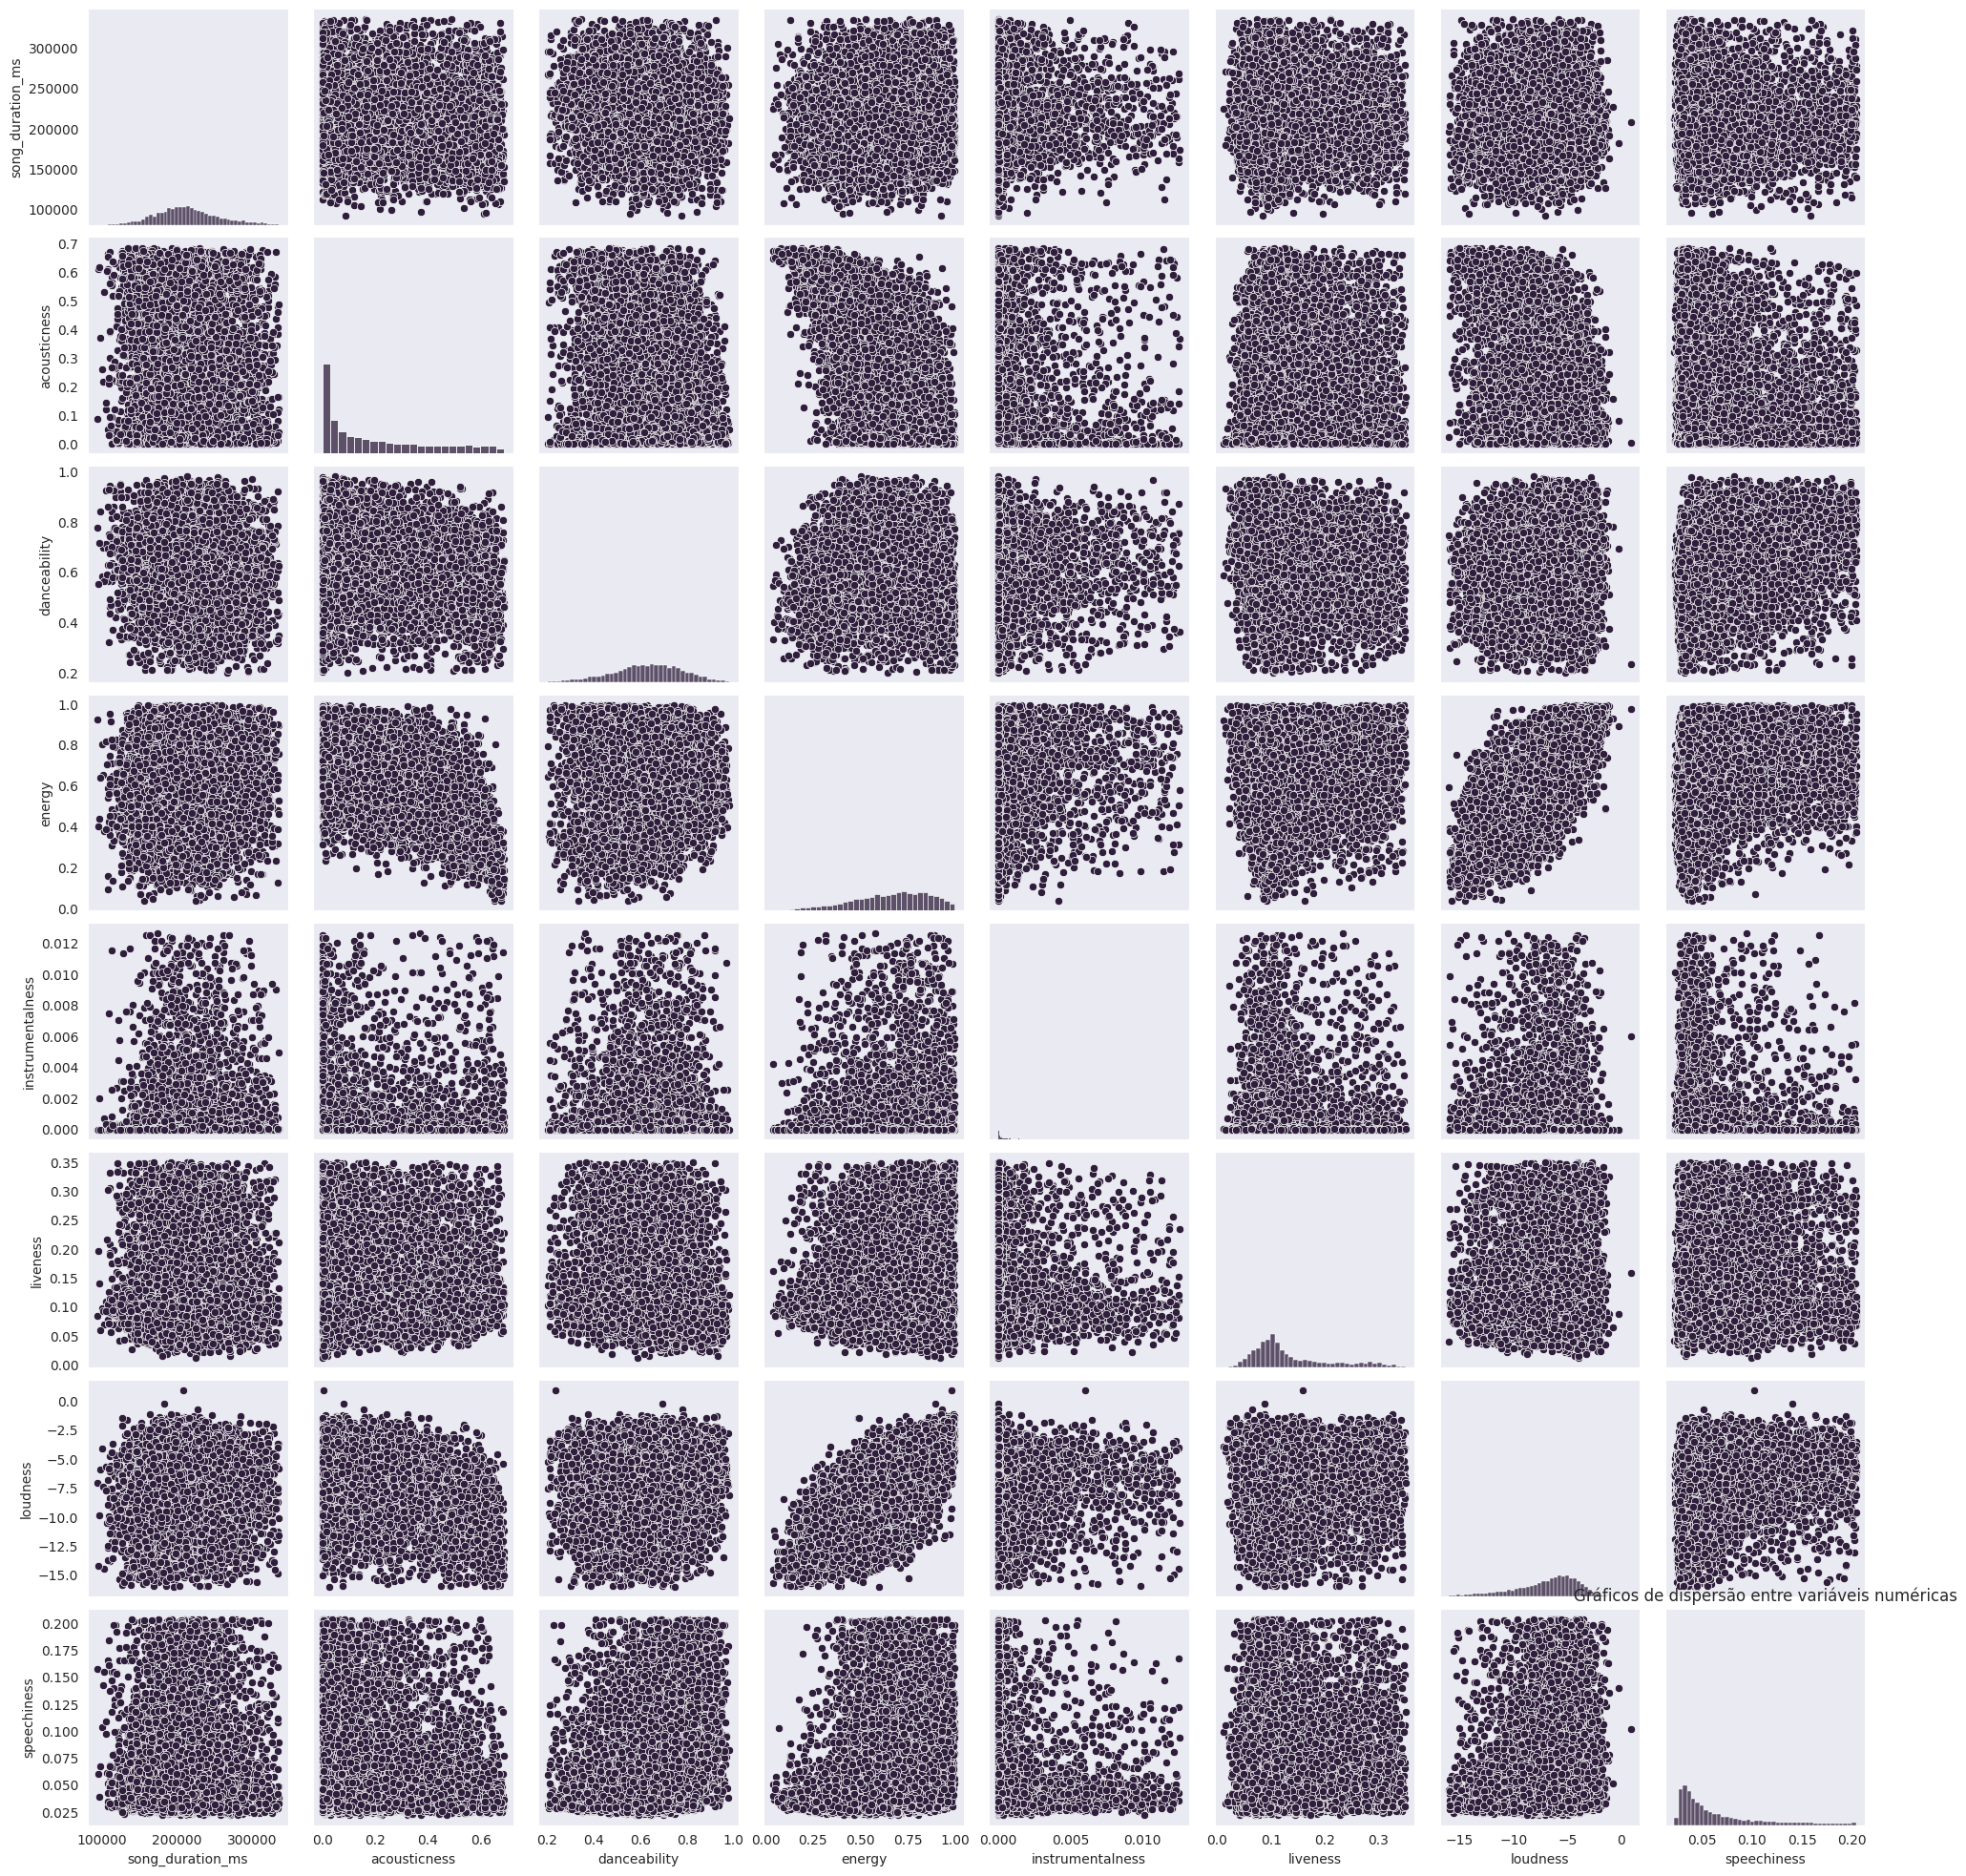

In [ ]:
sns.pairplot(X[X.columns[:8]])

plt.title('Gráficos de dispersão entre variáveis numéricas')

# Conclusões finais:

- É coerente, frente aos resultados dos algoritmos, cogitar a possibilidade de adicionar outras variáveis mais relevantes ao dataframe:

A saber:


1.   Relevância do artista(número de seguidores..etc);
2.   Ano em que a música foi liberada;
3.   Se alguma música prévia do artista fez considerável sucesso(precisa-se metrificar o que é fazer sucesso), ou se faz parte de algum álbum conhecido.



---



---

Após analisar todos os gráficos plotados, cujo objetivo é dar-nos uma percepção acerca do comportamento individual e coletivo das variáveis, pude concluir que as variáveis das quais dispusemos para realizar a análise não são explicativas o suficiente do nível de popularidade para as utilizarmos num modelo linear ou não-linear.




